# TensorFlow2教程-自编码器

![](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

自动编码器的两个主要组成部分; 编码器和解码器
编码器将输入压缩成一小组“编码”（通常，编码器输出的维数远小于编码器输入）
解码器然后将编码器输出扩展为与编码器输入具有相同维度的输出
换句话说，自动编码器旨在“重建”输入，同时学习数据的有限表示（即“编码”）

##  1.导入数据

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from IPython.display import SVG
print(tf.__version__)

1.13.1


In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 784)   (60000,)
(10000, 784)   (10000,)


## 2.简单的自编码器

In [22]:
code_dim = 32
inputs = layers.Input(shape=(x_train.shape[1],), name='inputs')
code = layers.Dense(code_dim, activation='relu', name='code')(inputs)
outputs = layers.Dense(x_train.shape[1], activation='softmax', name='outputs')(code)

auto_encoder = keras.Model(inputs, outputs)
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
code (Dense)                 (None, 32)                25120     
_________________________________________________________________
outputs (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [23]:
keras.utils.plot_model(auto_encoder, show_shapes=True)

In [24]:
encoder = keras.Model(inputs,code)
keras.utils.plot_model(encoder, show_shapes=True)

In [25]:
decoder_input = keras.Input((code_dim,))
decoder_output = auto_encoder.layers[-1](decoder_input)
decoder = keras.Model(decoder_input, decoder_output)
keras.utils.plot_model(decoder, show_shapes=True)

In [26]:
auto_encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

### 训练模型

In [27]:
%%time
history = auto_encoder.fit(x_train, x_train, batch_size=64, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 86us/sample - loss: 0.7068 - val_loss: 0.6801
Epoch 2/50
54000/54000 [==============================] - 4s 75us/sample - loss: 0.6797 - val_loss: 0.6741
Epoch 3/50
54000/54000 [==============================] - 4s 75us/sample - loss: 0.6767 - val_loss: 0.6729
Epoch 4/50
54000/54000 [==============================] - 4s 75us/sample - loss: 0.6758 - val_loss: 0.6726
Epoch 5/50
54000/54000 [==============================] - 4s 77us/sample - loss: 0.6753 - val_loss: 0.6720
Epoch 6/50
54000/54000 [==============================] - 5s 85us/sample - loss: 0.6750 - val_loss: 0.6718
Epoch 7/50
54000/54000 [==============================] - 5s 86us/sample - loss: 0.6748 - val_loss: 0.6716
Epoch 8/50
54000/54000 [==============================] - 5s 86us/sample - loss: 0.6746 - val_loss: 0.6716
Epoch 9/50
54000/54000 [==============================] - 5s 87us/sample - loss: 0.6745 - val_l

In [28]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

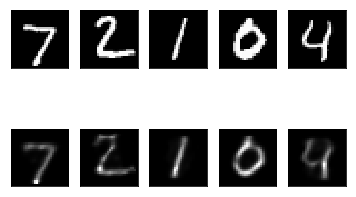

In [30]:
n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 使用SVM分类器进行分类

In [31]:
x_train=encoder.predict(x_train)
x_test=encoded
#手写数字识别
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
svc = SVC(10)
svc.fit(x_train,y_train)
predict = svc.predict(x_test)
print("accuracy_score: %.4lf" % accuracy_score(predict,y_test))
print("Classification report for classifier %s:\n%s\n" % (svc, classification_report(y_test, predict)))

accuracy_score: 0.9825
Classification report for classifier SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.99      0.99       958
          7       0.97      0.97      0.97      1028
          8       0.98      0.98      0.98       974
          9       0.97      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000


